In [10]:
%cd ../src
import pickle
import pandas as pd
from utils import IMAGE_TYPES, RDF_DATE_TYPES, RDF_NUMBER_TYPES, POTENTIAL_TEXT_TYPES, RDF_DATE_TYPES, get_relevant_relations
import matplotlib.pyplot as plt
from preprocess.binning import URI_PREFIX, encode_number_sublist
import math
from sklearn.neighbors import LocalOutlierFactor
import torch
import numpy as np

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


In [3]:
def load_dataset(dataset):
    with open(f"../data/raw/{dataset}_final_torch_None.pickle", "rb") as f:
        data = pickle.load(f)
    
    print("# nodes")
    print(len(data.i2e))
    print("datatypes")
    print(data.datatypes())
    return data

In [4]:
data = load_dataset('amplus')

# nodes
1153221
datatypes
['iri', 'blank_node', 'none', 'http://kgbench.info/dt#base64Image', 'http://www.w3.org/2001/XMLSchema#date', 'http://www.w3.org/2001/XMLSchema#decimal', 'http://www.w3.org/2001/XMLSchema#positiveInteger']


In [5]:
relevent_relations = get_relevant_relations(
    data, relevant_types=RDF_NUMBER_TYPES)

In [7]:
for r in relevent_relations:
    print(r)
    print(data.i2r[r])

11
http://purl.org/collections/nl/am/dimensionValue
15
http://purl.org/collections/nl/am/exhibitionLref


In [11]:
sub_df = encode_number_sublist(
    data.triples[data.triples[:, 1] == relevent_relations[0]], data.i2e)
no_LOF = sub_df.clone()


lof = LocalOutlierFactor(n_neighbors=200)
lof.fit(sub_df[:, 1].to(torch.int).reshape(-1, 1))
outlier_scores = lof.negative_outlier_factor_
# Create a new column in the numpy array to store the outlier scores
# tensor_np = torch.hstack((encoded_df, outlier_scores.reshape(-1,1)))
threshold = np.percentile(outlier_scores, 5)
# use the outlier scores to filter out the outliers from the numpy array
outliers = sub_df[(outlier_scores <= threshold)
                    & (outlier_scores < -1)]
sub_df = sub_df[(outlier_scores > threshold)
                | (outlier_scores >= -1)]





In [17]:
import seaborn as sns
path = "../docs/plots/"

<Figure size 640x480 with 0 Axes>

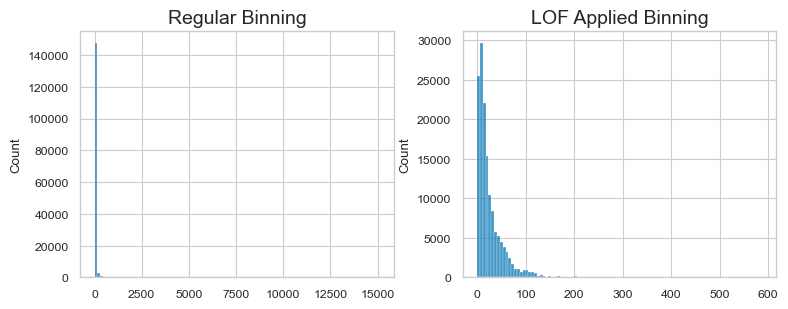

In [23]:
sns.set_theme(context="paper", style="whitegrid",font_scale=1,palette='colorblind')

plot_names = ['Regular Binning','LOF Applied Binning'] 
plt.clf()
fix, ax = plt.subplots(1,2, figsize=(8, 3))
plt.subplots_adjust(left=0.11, right=0.98, bottom=0.08, top=0.90, wspace=0.22, hspace=0.3)
#plt.tight_layout()
sub_dfs=[]
sub_dfs.append(no_LOF)
sub_dfs.append(sub_df)
# sub_df = encode_number_sublist(data.triples[torch.isin(data.triples[:, 1],torch.tensor(relevant_relations))],data.i2e)
# sub_dfs.append(sub_df)
# #ax[i].hist(sub_df[:,1])
# sub_df = encode_number_sublist(data.triples[torch.isin(data.triples[:, 1],torch.tensor(relevant_relations[4]))],data.i2e)
# sub_dfs.append(sub_df)
#ax[i].hist(sub_df[:,1])
for i in range(2):
    name = plot_names[i]
    #df = pd.DataFrame(class_counts[name])
    #df = df.rename(columns={"classes": "Classes", "counts": "Occurences"})
    #sub_df = encode_number_sublist(data.triples[torch.isin(data.triples[:, 1],torch.tensor(relevant_relations[4]))],data.i2e)
    df=sub_dfs[i]
    sns.histplot(df[:,1],bins=100, ax=ax[i])

    #sns.barplot(df, x="Classes", y="Occurences",ax=ax[i][j])

    ax[i].set_title(name,fontsize=14)




plt.savefig(f'{path}LOF_HIST.pgf', format='pgf', backend='pgf')

(array([1.47399e+05, 2.85800e+03, 7.15000e+02, 3.42000e+02, 9.40000e+01,
        1.05000e+02, 3.30000e+01, 3.10000e+01, 3.20000e+01, 1.20000e+01,
        1.20000e+01, 2.30000e+01, 2.20000e+01, 1.60000e+01, 6.00000e+00,
        0.00000e+00, 3.00000e+00, 1.00000e+00, 4.00000e+00, 2.00000e+00,
        6.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

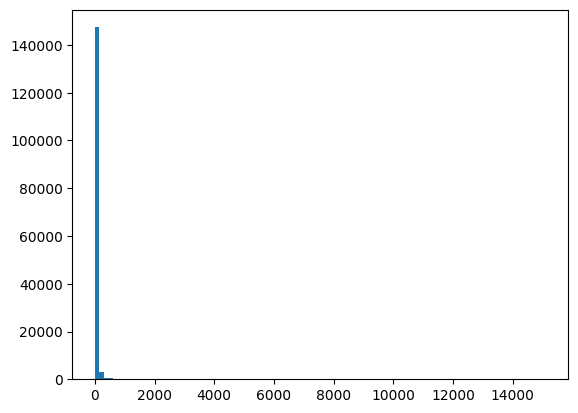

In [14]:
import matplotlib.pyplot as plt
plt.hist(no_LOF[:,1],bins=100)

(array([2.5493e+04, 2.9643e+04, 2.2031e+04, 1.5333e+04, 1.0433e+04,
        8.3710e+03, 5.7260e+03, 5.2140e+03, 4.5370e+03, 3.8610e+03,
        3.2580e+03, 2.4080e+03, 1.7110e+03, 1.0560e+03, 1.0770e+03,
        6.6300e+02, 9.3700e+02, 9.0800e+02, 6.7100e+02, 6.3900e+02,
        6.1800e+02, 2.0900e+02, 2.5600e+02, 1.6200e+02, 0.0000e+00,
        1.3800e+02, 5.9000e+01, 1.1900e+02, 2.2900e+02, 3.4000e+01,
        1.1200e+02, 0.0000e+00, 8.5000e+01, 6.0000e+00, 1.4700e+02,
        0.0000e+00, 6.7000e+01, 6.9000e+01, 2.4000e+01, 0.0000e+00,
        0.0000e+00, 4.8000e+01, 1.1700e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 8.3000e+01, 2.9000e+01, 4.6000e+01, 6.1000e+01,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4000e+01, 6.1000e+01,
        1.3000e+01, 9.0000e+00, 1.0000e+00, 0.00

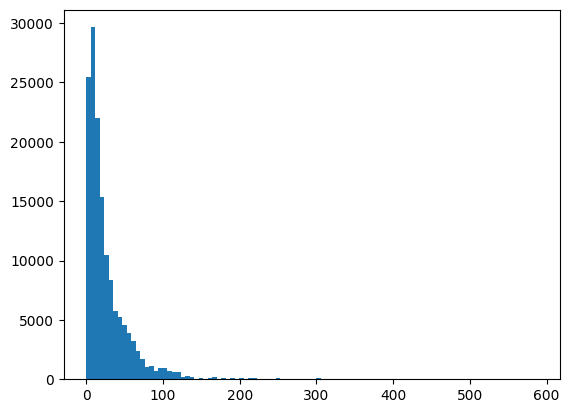

In [15]:
import matplotlib.pyplot as plt
plt.hist(sub_df[:,1],bins=100)

In [ ]:
def bin_numbers(data: Data, num_bins=3, use_lof=False, num_bins_as_percent=False, equal_height_binning=False, **kwargs):
    relevent_relations = get_relevant_relations(
        data, relevant_types=RDF_NUMBER_TYPES)

    bin_percent = num_bins / 100

    if f'{URI_PREFIX}predicat#prevBin' not in data.r2i:
        p = f'{URI_PREFIX}predicat#prevBin'
        new_id = len(data.i2r)
        data.r2i[p] = new_id
        data.i2r.append(p)
        data.num_relations += 1

        p = f'{URI_PREFIX}predicat#nextBin'
        new_id = len(data.i2r)
        data.r2i[p] = new_id
        data.i2r.append(p)
        data.num_relations += 1

    for r in relevent_relations:
        p = f'{URI_PREFIX}predicat#binning{r}'
        new_id = len(data.i2r)
        data.r2i[p] = new_id
        data.i2r.append(p)
        data.num_relations += 1

    for relation in relevent_relations:
        sub_df = encode_number_sublist(
            data.triples[data.triples[:, 1] == relation], data.i2e)

        if num_bins_as_percent:
            num_bins = math.floor(len(sub_df[:, 1].unique()) * bin_percent)
            if num_bins < 1:
                num_bins = 1
            print(num_bins)

        for b in range(num_bins):
            o = (f'{URI_PREFIX}entity#binning{b+1}#relation{relation}',
                 f'{URI_PREFIX}datatype#bin')
            new_id = len(data.i2e)
            data.e2i[o] = new_id
            data.i2e.append(o)
            data.num_entities += 1
            if (f'{URI_PREFIX}entity#binning{b}#relation{relation}', f'{URI_PREFIX}datatype#bin') in data.e2i:
                data = add_triple(data, o, f'{URI_PREFIX}predicat#prevBin', (
                    f'{URI_PREFIX}entity#binning{b}#relation{relation}', f'{URI_PREFIX}datatype#bin'))
                data = add_triple(data, (f'{URI_PREFIX}entity#binning{b}#relation{relation}',
                                  f'{URI_PREFIX}datatype#bin'), f'{URI_PREFIX}predicat#nextBin', o)

        augmented_df = data.triples.clone()
        augmented_df = augmented_df[augmented_df[:, 1] == relation]

        if (use_lof):
            lof = LocalOutlierFactor(n_neighbors=200)
            lof.fit(sub_df[:, 1].to(torch.int).reshape(-1, 1))
            outlier_scores = lof.negative_outlier_factor_
            # Create a new column in the numpy array to store the outlier scores
            # tensor_np = torch.hstack((encoded_df, outlier_scores.reshape(-1,1)))
            threshold = np.percentile(outlier_scores, 5)
            # use the outlier scores to filter out the outliers from the numpy array
            outliers = sub_df[(outlier_scores <= threshold)
                              & (outlier_scores < -1)]
            sub_df = sub_df[(outlier_scores > threshold)
                            | (outlier_scores >= -1)]
            outlier_df = augmented_df[(outlier_scores <= threshold) & (
                outlier_scores < -1)].clone()
            augmented_df = augmented_df[(
                outlier_scores > threshold) | (outlier_scores >= -1)]
            if len(outliers) > 0:

                data.i2r.append(
                    f'{URI_PREFIX}predicat#outlier-{relation}')
                data.r2i[f'{URI_PREFIX}predicat#outlier-{relation}'] = data.num_relations

                data.i2e.append(
                    (f'{URI_PREFIX}entitys#outlier-{relation}', f'{URI_PREFIX}outlier'))
                data.e2i[(f'{URI_PREFIX}entitys#outlier-{relation}',
                          f'{URI_PREFIX}outlier')] = data.num_entities

                data.num_relations += 1
                data.num_entities += 1

                object_mapping = np.vectorize(lambda t: data.e2i[(
                    f'{URI_PREFIX}entitys#outlier-{relation}', f'{URI_PREFIX}outlier')])

                predicat_mapping = np.vectorize(
                    lambda t: data.r2i[f'{URI_PREFIX}predicat#outlier-{relation}'])

                outlier_df[:, 1] = torch.tensor(
                    np.array([predicat_mapping(outliers[:, 0])]), dtype=torch.int32)
                outlier_df[:, 2] = torch.tensor(
                    np.array([object_mapping(outliers[:, 0])]), dtype=torch.int32)
                data.triples = torch.cat((data.triples, outlier_df), 0)

        # numpy is used here since torch.histc was not working for some reason.
        sub_df = torch.cat(  # put bins and sub_df together
            (sub_df, torch.from_numpy(  # get numpy solutions back
                np.digitize(  # assign for each value in sub_df the corresponding bin
                    sub_df[:, 1], np.histogram(  # calculate n bins based on values in sub_df
                        sub_df[:, 1], num_bins)[1][:-1]
                )
            ).reshape(-1, 1)  # transfrom x tensor into (x,1) tensor to fit (x,2) shape of sub_df
            ), 1)

        object_mapping = np.vectorize(lambda t: data.e2i[(
            f'{URI_PREFIX}entity#binning{int(t)}#relation{relation}', f'{URI_PREFIX}datatype#bin')])

        predicat_mapping = np.vectorize(
            lambda t: data.r2i[f'{URI_PREFIX}predicat#binning{relation}'])

        augmented_df[:, 1] = torch.tensor(
            np.array([predicat_mapping(sub_df[:, 2])]), dtype=torch.int32)
        augmented_df[:, 2] = torch.tensor(
            np.array([object_mapping(sub_df[:, 2])]), dtype=torch.int32)
        data.triples = torch.cat((data.triples, augmented_df), 0)

    return data